## Finetuning a network
Git clone from this repository: https://github.com/MiguelAMartinez/flowers-image-classifier

In [1]:
import os

ROOT_DIR = os.getcwd()
os.chdir(ROOT_DIR + '/flowers-image-classifier')

## Task 1
Replace the used base model (densenet169) to another model (refer to https://pytorch.org/vision/0.8/models.html for more types of models). Pls compare the performance of these two models on the validation set.

### Changelog
I replaced the base model with resnet18.

1. In `train.py`: A checking condition for the architecture type (either densenet169 or resnet18)
2. In `model_ic.py`: A separate `make_NN_resnet()` (for resnet18), similar to `make_NN()` (for densenet169)
    - Replaced all occurrences of `model.classifier` with `model.fc`

In [2]:
%run train.py "flowers" --gpu --epoch 5 --arch densenet169

Epoch: 1/5 -  Training Loss: 4.298 -  Validation Loss: 3.685 -  Validation Accuracy: 0.304
Epoch: 1/5 -  Training Loss: 3.306 -  Validation Loss: 2.470 -  Validation Accuracy: 0.500
Epoch: 1/5 -  Training Loss: 2.394 -  Validation Loss: 1.600 -  Validation Accuracy: 0.661
Epoch: 1/5 -  Training Loss: 1.724 -  Validation Loss: 1.158 -  Validation Accuracy: 0.755
Epoch: 1/5 -  Training Loss: 1.506 -  Validation Loss: 0.857 -  Validation Accuracy: 0.821
Epoch: 2/5 -  Training Loss: 1.128 -  Validation Loss: 0.716 -  Validation Accuracy: 0.856
Epoch: 2/5 -  Training Loss: 0.896 -  Validation Loss: 0.580 -  Validation Accuracy: 0.874
Epoch: 2/5 -  Training Loss: 0.911 -  Validation Loss: 0.564 -  Validation Accuracy: 0.881
Epoch: 2/5 -  Training Loss: 0.797 -  Validation Loss: 0.477 -  Validation Accuracy: 0.894
Epoch: 2/5 -  Training Loss: 0.707 -  Validation Loss: 0.420 -  Validation Accuracy: 0.905
Epoch: 3/5 -  Training Loss: 0.630 -  Validation Loss: 0.370 -  Validation Accuracy: 0.921

In [3]:
%run train.py "flowers" --gpu --epoch 5 --arch resnet18

Epoch: 1/5 -  Training Loss: 4.327 -  Validation Loss: 3.566 -  Validation Accuracy: 0.303
Epoch: 1/5 -  Training Loss: 3.291 -  Validation Loss: 2.461 -  Validation Accuracy: 0.497
Epoch: 1/5 -  Training Loss: 2.463 -  Validation Loss: 1.630 -  Validation Accuracy: 0.608
Epoch: 1/5 -  Training Loss: 1.787 -  Validation Loss: 1.169 -  Validation Accuracy: 0.749
Epoch: 1/5 -  Training Loss: 1.526 -  Validation Loss: 0.963 -  Validation Accuracy: 0.792
Epoch: 2/5 -  Training Loss: 1.254 -  Validation Loss: 0.794 -  Validation Accuracy: 0.824
Epoch: 2/5 -  Training Loss: 1.144 -  Validation Loss: 0.705 -  Validation Accuracy: 0.832
Epoch: 2/5 -  Training Loss: 1.031 -  Validation Loss: 0.596 -  Validation Accuracy: 0.863
Epoch: 2/5 -  Training Loss: 0.974 -  Validation Loss: 0.561 -  Validation Accuracy: 0.870
Epoch: 2/5 -  Training Loss: 0.864 -  Validation Loss: 0.519 -  Validation Accuracy: 0.888
Epoch: 3/5 -  Training Loss: 0.832 -  Validation Loss: 0.473 -  Validation Accuracy: 0.901

## Task 2
Please try different training methods that use densenet169 as the base model (i.e., training the whole model from scratch, finetuning the model but only updating the top layers, finetuning the whole model), and compare their performance on the validation set. Please also draw the curves of training/validation losses over training steps for these methods, and give your analysis based on the observed curves.

### Changelog
1. In `train.py`:
    1. Extra argument parser called `training_pref` (default=None), which accepts the following values:
        - scratch
        - finetune_top
        - finetune_all
    2. Extra argument parser called `plot_graph` (default=False), which plots the train and test loss-step graph.
2. In `make_NN()` of `model_ic.py`:
    1. Checking conditions for the argument values of `training_pref`, which freezes the model parameters accordingly
    2. A more general solution that passes a list of trainable parameters into the Adam optimizer
        - `optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = lr)`
3. In `utils_ic.py`:
    1. Wrote an extra `plot_loss_step_graph()`, which plots the average train and test loss every 40 steps. The function is imported by `model_ic.py` and used in `make_NN()`
    2. In `load_data()`: Reduced the `trainloader` batch size from 64 to 32, due to lack of memory in CUDA

### a) Training the whole model from scratch
Loading the densenet169 model, with pretrained set to False. 

In particular, this is how the weights would be initialized according to the [source code](https://github.com/pytorch/vision/blob/master/torchvision/models/densenet.py): 
```
if isinstance(m, nn.Conv2d):
    nn.init.kaiming_normal_(m.weight)
elif isinstance(m, nn.BatchNorm2d):
    nn.init.constant_(m.weight, 1)
    nn.init.constant_(m.bias, 0)
elif isinstance(m, nn.Linear):
    nn.init.constant_(m.bias, 0)
```

Epoch: 1/5 -  Training Loss: 4.512 -  Validation Loss: 7.336 -  Validation Accuracy: 0.075
Epoch: 1/5 -  Training Loss: 4.007 -  Validation Loss: 3.760 -  Validation Accuracy: 0.101
Epoch: 1/5 -  Training Loss: 3.890 -  Validation Loss: 4.062 -  Validation Accuracy: 0.091
Epoch: 1/5 -  Training Loss: 3.693 -  Validation Loss: 3.625 -  Validation Accuracy: 0.129
Epoch: 1/5 -  Training Loss: 3.661 -  Validation Loss: 3.557 -  Validation Accuracy: 0.139
Epoch: 2/5 -  Training Loss: 3.544 -  Validation Loss: 3.389 -  Validation Accuracy: 0.141
Epoch: 2/5 -  Training Loss: 3.457 -  Validation Loss: 3.380 -  Validation Accuracy: 0.149
Epoch: 2/5 -  Training Loss: 3.480 -  Validation Loss: 3.415 -  Validation Accuracy: 0.155
Epoch: 2/5 -  Training Loss: 3.406 -  Validation Loss: 3.247 -  Validation Accuracy: 0.169
Epoch: 2/5 -  Training Loss: 3.345 -  Validation Loss: 3.166 -  Validation Accuracy: 0.195
Epoch: 3/5 -  Training Loss: 3.320 -  Validation Loss: 3.118 -  Validation Accuracy: 0.180

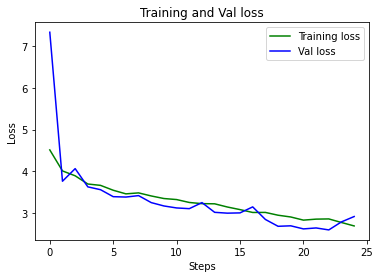

In [4]:
%run train.py "flowers" --gpu --epoch 5 --training_pref scratch --plot_graph True --arch densenet169

### b) Finetuning the model but only updating the top layers
I iterated through the layers in `model.features` and set the parameters in top layers 7 to 12 to trainable.

Epoch: 1/5 -  Training Loss: 4.403 -  Validation Loss: 3.898 -  Validation Accuracy: 0.183
Epoch: 1/5 -  Training Loss: 3.420 -  Validation Loss: 2.796 -  Validation Accuracy: 0.355
Epoch: 1/5 -  Training Loss: 2.636 -  Validation Loss: 2.098 -  Validation Accuracy: 0.501
Epoch: 1/5 -  Training Loss: 2.132 -  Validation Loss: 1.557 -  Validation Accuracy: 0.627
Epoch: 1/5 -  Training Loss: 1.775 -  Validation Loss: 1.337 -  Validation Accuracy: 0.646
Epoch: 2/5 -  Training Loss: 1.447 -  Validation Loss: 1.195 -  Validation Accuracy: 0.688
Epoch: 2/5 -  Training Loss: 1.214 -  Validation Loss: 1.144 -  Validation Accuracy: 0.694
Epoch: 2/5 -  Training Loss: 1.185 -  Validation Loss: 0.933 -  Validation Accuracy: 0.750
Epoch: 2/5 -  Training Loss: 1.092 -  Validation Loss: 0.799 -  Validation Accuracy: 0.795
Epoch: 2/5 -  Training Loss: 0.983 -  Validation Loss: 0.772 -  Validation Accuracy: 0.812
Epoch: 3/5 -  Training Loss: 0.849 -  Validation Loss: 0.867 -  Validation Accuracy: 0.759

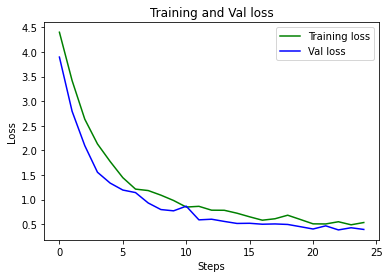

In [5]:
%run train.py "flowers" --gpu --epoch 5 --training_pref finetune_top --plot_graph True --arch densenet169 --save_dir "modelcp.pth"

### c) Finetuning the whole model

Epoch: 1/5 -  Training Loss: 4.266 -  Validation Loss: 3.863 -  Validation Accuracy: 0.139
Epoch: 1/5 -  Training Loss: 3.346 -  Validation Loss: 3.095 -  Validation Accuracy: 0.273
Epoch: 1/5 -  Training Loss: 2.774 -  Validation Loss: 2.778 -  Validation Accuracy: 0.333
Epoch: 1/5 -  Training Loss: 2.455 -  Validation Loss: 2.293 -  Validation Accuracy: 0.421
Epoch: 1/5 -  Training Loss: 2.064 -  Validation Loss: 2.035 -  Validation Accuracy: 0.513
Epoch: 2/5 -  Training Loss: 1.893 -  Validation Loss: 1.543 -  Validation Accuracy: 0.555
Epoch: 2/5 -  Training Loss: 1.651 -  Validation Loss: 1.443 -  Validation Accuracy: 0.596
Epoch: 2/5 -  Training Loss: 1.513 -  Validation Loss: 1.120 -  Validation Accuracy: 0.671
Epoch: 2/5 -  Training Loss: 1.426 -  Validation Loss: 1.145 -  Validation Accuracy: 0.680
Epoch: 2/5 -  Training Loss: 1.263 -  Validation Loss: 0.942 -  Validation Accuracy: 0.739
Epoch: 3/5 -  Training Loss: 1.140 -  Validation Loss: 0.879 -  Validation Accuracy: 0.746

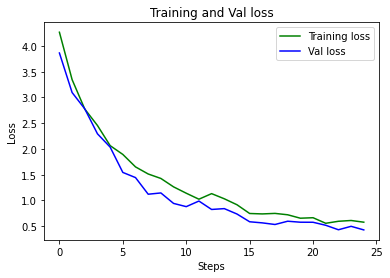

In [6]:
%run train.py "flowers" --gpu --epoch 5 --training_pref finetune_all --plot_graph True --arch densenet169

## Task 3
For the model based on densenet169, please also report its performance (when you use the training method of finetuning the model but only updating the top layers) on the testing set.

### Changelog
1. Extra `evaluate.py` file, which prints the testing accuracy of the model given a test dataset
    - Can be found in hw3/task2/flowers-image-classifier/evaluate.py

In [7]:
%run evaluate.py "flowers" "modelcp.pth" --gpu

Testing Accuracy: 0.879


# Task 4
Please replace the base model to a new model which contains some convolutional layers. You need to write this new model by yourselves, and then report its performance on the validation set. Note, pls try different numbers of convolutional layers for your model, and compare their results, and give analysis for the results. You need to try at least 2 different numbers of conv layers.

### Changelog
1. In `model_ic.py`:
    1. A new `CustomCNN` class, which takes in variable number of convolution layers specified by user
    2. A separate `make_NN_CNN()`, similar to `make_NN()` (for densenet169), that creates an instance of the `CustomCNN` class
2. In `train.py`:
    1. Extra argument parser called `num_layers` (default=1)
    2. If the argument value of `arch` is custom, call the `make_NN_CNN()`

### 2 conv layers 

Epoch: 1/10 -  Training Loss: 4.311 -  Validation Loss: 3.870 -  Validation Accuracy: 0.101
Epoch: 1/10 -  Training Loss: 3.644 -  Validation Loss: 3.469 -  Validation Accuracy: 0.158
Epoch: 1/10 -  Training Loss: 3.423 -  Validation Loss: 3.262 -  Validation Accuracy: 0.186
Epoch: 1/10 -  Training Loss: 3.276 -  Validation Loss: 3.094 -  Validation Accuracy: 0.210
Epoch: 1/10 -  Training Loss: 3.145 -  Validation Loss: 2.945 -  Validation Accuracy: 0.243
Epoch: 2/10 -  Training Loss: 2.939 -  Validation Loss: 2.877 -  Validation Accuracy: 0.270
Epoch: 2/10 -  Training Loss: 2.878 -  Validation Loss: 2.813 -  Validation Accuracy: 0.254
Epoch: 2/10 -  Training Loss: 2.907 -  Validation Loss: 2.669 -  Validation Accuracy: 0.306
Epoch: 2/10 -  Training Loss: 2.695 -  Validation Loss: 2.623 -  Validation Accuracy: 0.330
Epoch: 2/10 -  Training Loss: 2.678 -  Validation Loss: 2.585 -  Validation Accuracy: 0.333
Epoch: 3/10 -  Training Loss: 2.616 -  Validation Loss: 2.561 -  Validation Accu

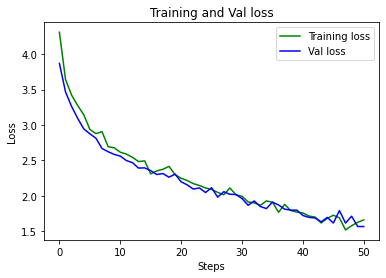

In [8]:
%run train.py "flowers" --gpu --epoch 10 --num_layers 2 --plot_graph True --arch custom

### 3 conv layers 

Epoch: 1/10 -  Training Loss: 4.287 -  Validation Loss: 3.993 -  Validation Accuracy: 0.106
Epoch: 1/10 -  Training Loss: 3.718 -  Validation Loss: 3.375 -  Validation Accuracy: 0.155
Epoch: 1/10 -  Training Loss: 3.335 -  Validation Loss: 3.202 -  Validation Accuracy: 0.196
Epoch: 1/10 -  Training Loss: 3.166 -  Validation Loss: 3.009 -  Validation Accuracy: 0.229
Epoch: 1/10 -  Training Loss: 3.045 -  Validation Loss: 2.927 -  Validation Accuracy: 0.253
Epoch: 2/10 -  Training Loss: 2.900 -  Validation Loss: 2.741 -  Validation Accuracy: 0.269
Epoch: 2/10 -  Training Loss: 2.774 -  Validation Loss: 2.733 -  Validation Accuracy: 0.274
Epoch: 2/10 -  Training Loss: 2.690 -  Validation Loss: 2.648 -  Validation Accuracy: 0.295
Epoch: 2/10 -  Training Loss: 2.639 -  Validation Loss: 2.624 -  Validation Accuracy: 0.302
Epoch: 2/10 -  Training Loss: 2.706 -  Validation Loss: 2.491 -  Validation Accuracy: 0.340
Epoch: 3/10 -  Training Loss: 2.572 -  Validation Loss: 2.519 -  Validation Accu

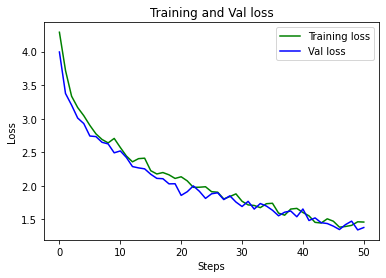

In [9]:
%run train.py "flowers" --gpu --epoch 10 --num_layers 3 --plot_graph True --arch custom

### 4 conv layers 

Epoch: 1/10 -  Training Loss: 4.288 -  Validation Loss: 3.887 -  Validation Accuracy: 0.105
Epoch: 1/10 -  Training Loss: 3.731 -  Validation Loss: 3.509 -  Validation Accuracy: 0.144
Epoch: 1/10 -  Training Loss: 3.289 -  Validation Loss: 3.309 -  Validation Accuracy: 0.188
Epoch: 1/10 -  Training Loss: 3.120 -  Validation Loss: 3.047 -  Validation Accuracy: 0.245
Epoch: 1/10 -  Training Loss: 2.998 -  Validation Loss: 2.946 -  Validation Accuracy: 0.255
Epoch: 2/10 -  Training Loss: 2.855 -  Validation Loss: 2.935 -  Validation Accuracy: 0.245
Epoch: 2/10 -  Training Loss: 2.801 -  Validation Loss: 2.747 -  Validation Accuracy: 0.277
Epoch: 2/10 -  Training Loss: 2.722 -  Validation Loss: 2.609 -  Validation Accuracy: 0.313
Epoch: 2/10 -  Training Loss: 2.580 -  Validation Loss: 2.466 -  Validation Accuracy: 0.351
Epoch: 2/10 -  Training Loss: 2.568 -  Validation Loss: 2.394 -  Validation Accuracy: 0.367
Epoch: 3/10 -  Training Loss: 2.417 -  Validation Loss: 2.452 -  Validation Accu

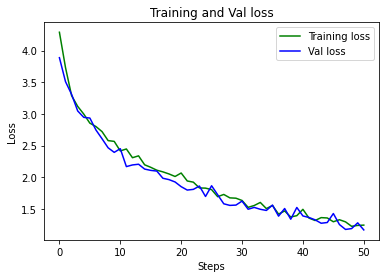

In [10]:
%run train.py "flowers" --gpu --epoch 10 --num_layers 4 --plot_graph True --arch custom